# Data Mining in Action 2016 (осенний семестр)

## Задача на семинар: цветовая сегментация кожи на изображении

В этом примере мы построим простой классификатор с использованием библиотеки scikit-learn. В качестве данных мы возьмем выборку из UCI Репозитория (www.archive.ics.uci.edu), связанную с задачей сегментации изображений, а точнее - выделением кожи на фотографиях. 

В итоге мы получим классификатор, который по RBG представлению цвета пикселя будет пытаться определить, принадлежит пиксель к участку кожи или нет.

<img src="skin_segmentation2.png" />

Для начала скачаем выборку по следующей ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt > Skin_NonSkin.txt

## Задаем кодировку

В Python кодировка файла скрипта задается с помощью так называемого magic comment: # coding: utf-8
(либо другая кодировка по необходимости).

Волшебный комментарий должен быть в первых двух строчках скрипта, иначе он игнорируется интерпретатором. Добавив этот комментарий в скрипт можно, например, комфортно использовать в коде русскоязычные строки и комментарии. Однако для ipython notebook такой способ не подходит ведь разные блоки кода могут исполняться в разной последовательности. Есть другой способ, им и воспользуемся:

In [ ]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

После исполнения этого блока проблем с русскоязычными комментариями в коде быть не должно.

## Чтение выборки

Давайте посмотрим на выборку и попробуем понять, какой смысл имеют

In [1]:
dataset_path = "Skin_NonSkin.txt"
dataset_file = open(dataset_path, 'r')
dataset_text = dataset_file.read().split('\n')

In [2]:
dataset = [map(int, line.split('\t')) for line in dataset_text if len(line) > 0]
print dataset[:10]

[[74, 85, 123, 1], [73, 84, 122, 1], [72, 83, 121, 1], [70, 81, 119, 1], [70, 81, 119, 1], [69, 80, 118, 1], [70, 81, 119, 1], [70, 81, 119, 1], [76, 87, 125, 1], [76, 87, 125, 1]]


In [3]:
X = [line[:-1] for line in dataset]
y = [line[-1] for line in dataset]

In [4]:
import numpy as np

np.random.seed(0)
indices = np.random.permutation(len(X))
X = np.array(X)
y = np.array(y)
test_size = 100000
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]
y_test  = y[indices[-test_size:]]

In [5]:
print X, y

[[ 74  85 123]
 [ 73  84 122]
 [ 72  83 121]
 ..., 
 [163 162 112]
 [163 162 112]
 [255 255 255]] [1 1 1 ..., 2 2 2]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
predicted = model.predict(X_test)
print predicted[:10]

[2 2 1 1 2 1 2 2 1 2]


In [8]:
print float(sum(y_test == predicted))/test_size

0.99948


## Чтение и обработка изображения

Для работы с графиками и изображениями в Python есть библиотека Matplotlib. На сайте библиотеки www.matplotlib.org описан API и есть большое количество примеров в разделе gallery. При необходимости построить график можно зайти в галерею, найти визуально картинку, наиболее похожую на нужную и посмотреть код.

Но сейчас мы воспользуемся matplotlib для работы с изображением, на котором хотим найти участки кожи. Для начала считаем изображение:

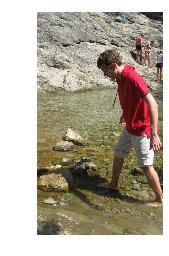

In [9]:
%matplotlib inline 
# чтобы изображения выводились прямо в ipython notebook, а не в отдельном окне


import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

image_path = "kantor.jpg"

image_file = open(image_path, 'rb')
#image_file = cbook.get_sample_data(image_path)
image = plt.imread(image_file)

plt.imshow(image)
plt.axis('off') # clear x- and y-axes
plt.show()

Посмотрим, в каком формате хранится изображение в переменой image:

In [10]:
print type(image)

<type 'numpy.ndarray'>


Поскольку это массив, попробуем вывести несколько его первых элементов:

In [11]:
print image[:3, :3]

[[[133 119 116]
  [123 109 106]
  [147 133 130]]

 [[176 165 161]
  [146 135 131]
  [165 154 150]]

 [[168 160 157]
  [150 142 139]
  [150 142 139]]]


Похоже на массив строк пикселей. Каждая строка - массив пикселей, а пиксель - массив из трех чисел - RGB представления цвета пикселя.

Обучим наш классификатор на всей обучающей выборке и прогоним классификатор по всем пикселям изображения, заменяя пиксели кожи на ярко зелёные:

In [12]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
predicted = model.predict(X_test)
print float(sum(y_test == predicted))/test_size

0.99965


In [14]:
for i, line in enumerate(image):
    classes = model.predict(line) # predict принимает список объектов
    for j, ans in enumerate(classes):
        if ans == 1:
            image[i, j, 0] = image[i, j, 2] = 0
            image[i, j, 1] = 255

Не правда ли, какой-то подозрительный результат?

## Задание

#### На семинаре:

1. Выяснить, почему на изображении не выделились участки кожи и исправить ситуацию. Подсказка: читайте документацию библиотек либо пробуйте визуализировать цвета, которые классификатор относит к коже. Блокнот с решением проблемы выложить на github.
1. Сравнить качество на отложенной выборке при разном количестве соседей k в kNN (от 1 до 10) и при разных весах во взвешенной версии kNN (см. документацию scikit-learn). 
1. Блокнот с исправлением детектирования кожи и экспериментами выслать на datamininginaction@gmail.com

#### Дополнительные задания (к следующему занятию):

1. С помощью matplotlib построить трёхмерную визуализацию выборки и выслать на тот же адрес.
1. Разобрать презенташку про numpy, scipy, matplotlib: http://mit.spbau.ru/files/scipy.pdf
1. Разобрать Crash Course in Python for scientists.

№ 1

In [15]:
# BGR -> RGB
X = np.array([xi[::-1] for xi in X])

In [16]:
model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
for i, line in enumerate(image):
    classes = model.predict(line) # predict принимает список объектов
    for j, ans in enumerate(classes):
        if ans == 1:
            image[i, j, 0] = image[i, j, 2] = 0
            image[i, j, 1] = 255

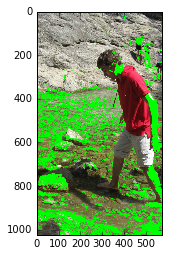

In [18]:
plt.imshow(image)
plt.show()

№ 2

In [19]:
from sklearn.cross_validation import cross_val_score

/home/alexander/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
def get_kNN_score(n_neighbors, weights, cv):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)    
    
    return cross_val_score(model, X, y, cv=cv)

In [21]:
%%time
max_neighbors = 10
cv = 3
uniform_score  = np.zeros((max_neighbors, cv))
distance_score = np.zeros((max_neighbors, cv))

for k in range(max_neighbors):
    uniform_score[k]  = get_kNN_score(k + 1, "uniform", cv)
    distance_score[k] = get_kNN_score(k + 1, "distance", cv)

CPU times: user 40.2 s, sys: 544 ms, total: 40.7 s
Wall time: 40.7 s


In [22]:
print "Uniform"
print uniform_score
print "Distance"
print distance_score

Uniform
[[ 0.94615968  0.98477095  0.99167534]
 [ 0.95728766  0.9867664   0.9888474 ]
 [ 0.95460666  0.9863012   0.98920242]
 [ 0.96218446  0.98754989  0.98724368]
 [ 0.95557378  0.98708469  0.98769664]
 [ 0.96223343  0.98784369  0.9866683 ]
 [ 0.96005435  0.98770903  0.98808839]
 [ 0.9628945   0.98825992  0.98459938]
 [ 0.95710403  0.98811302  0.98506458]
 [ 0.95976055  0.98854149  0.98461162]]
Distance
[[ 0.94615968  0.98477095  0.99167534]
 [ 0.94622089  0.98429351  0.99168758]
 [ 0.95449649  0.98648483  0.98908   ]
 [ 0.95242759  0.98619102  0.98960641]
 [ 0.95490047  0.98715814  0.98758646]
 [ 0.95501065  0.98719487  0.98797821]
 [ 0.95874446  0.98766006  0.98801494]
 [ 0.95696937  0.9875254   0.98717023]
 [ 0.95632054  0.9879049   0.98511355]
 [ 0.95703058  0.98795387  0.98479525]]


№ 1

In [23]:
from mpl_toolkits.mplot3d import Axes3D

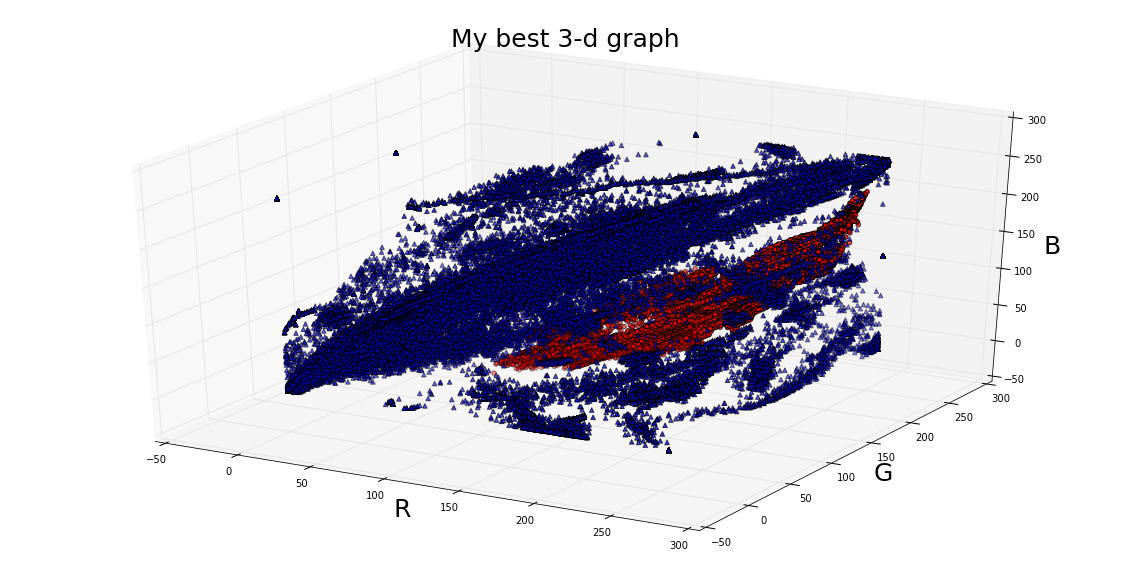

CPU times: user 33.4 s, sys: 344 ms, total: 33.7 s
Wall time: 32.1 s


In [24]:
%%time
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==1][:, 0], X[y==1][:, 1], X[y==1][:, 2], c="r", marker="o")
ax.scatter(X[y==2][:, 0], X[y==2][:, 1], X[y==2][:, 2], c="b", marker="^")

ax.set_xlabel('R', fontsize=25)
ax.set_ylabel('G', fontsize=25)
ax.set_zlabel('B', fontsize=25)
ax.set_title("My best 3-d graph", fontsize=25)

plt.show()

Т.к. такая визуализация не совсем наглядна, то возьмём 3000 случайных точек из каждого класса и визуализируем их

In [25]:
sample_size = 3000
y1_ids = np.random.choice(range(len(X[y==1])), size=sample_size)
y2_ids = np.random.choice(range(len(X[y==2])), size=sample_size)

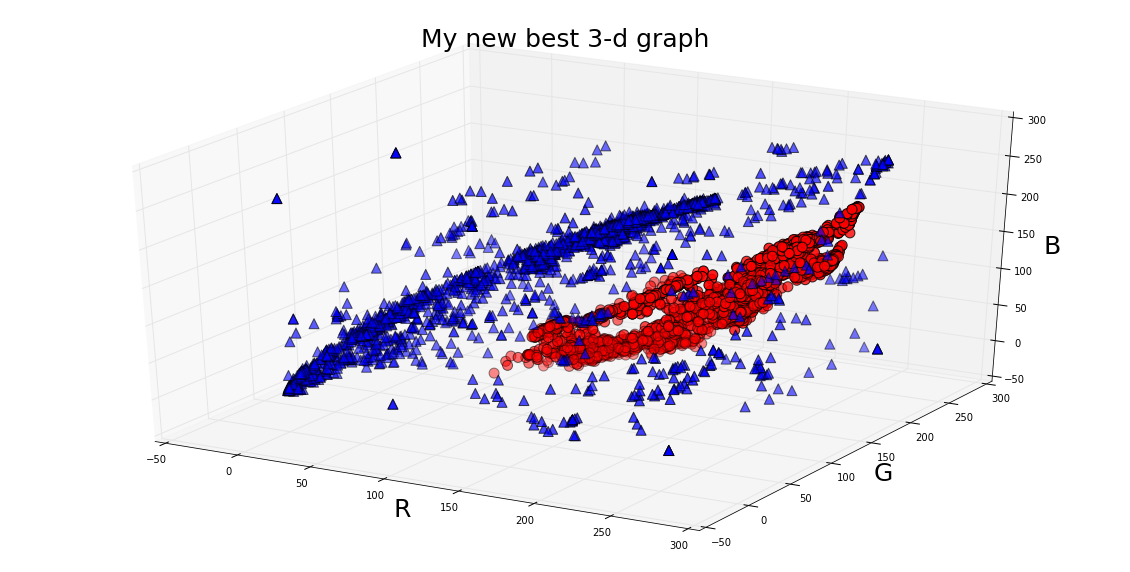

CPU times: user 2.62 s, sys: 48 ms, total: 2.66 s
Wall time: 1.65 s


In [26]:
%%time
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==1][y1_ids, 0], X[y==1][y1_ids, 1], X[y==1][y1_ids, 2], c="r", marker="o", s=100)
ax.scatter(X[y==2][y2_ids, 0], X[y==2][y2_ids, 1], X[y==2][y2_ids, 2], c="b", marker="^", s=100)

ax.set_xlabel('R', fontsize=25)
ax.set_ylabel('G', fontsize=25)
ax.set_zlabel('B', fontsize=25)
ax.set_title("My new best 3-d graph", fontsize=25)

plt.show()